In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
filteredGeneList = pd.read_csv('../../../RBC/Database/filteredGenesDetails_human_240118.txt',sep='\t')
acc2gene={}
for idx,row in filteredGeneList.iterrows():
    acc2gene[row['AccNum']] = row['GeneName']

In [2]:
fid = pd.read_csv('../../RBC_fid_table.csv')
fid.head(2)

,Barcodes,Sets,Types,Timepoint,Position,FileName
0,ATCACG,8,S24,0,ATCACG,ATCACG-s_5_1
1,TTAGGC,8,S24,1,TTAGGC,TTAGGC-s_5_1


In [3]:
for i in range(24):
    fname = fid['FileName'][i]
    fid['FileName'][i] = '24filesDec_'+fname
fid.head(2)

C:\Users\Putatu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Barcodes,Sets,Types,Timepoint,Position,FileName
0,ATCACG,8,S24,0,ATCACG,24filesDec_ATCACG-s_5_1
1,TTAGGC,8,S24,1,TTAGGC,24filesDec_TTAGGC-s_5_1


In [5]:
filename= 'gene_TXCDUTR_ReadOutput_processedData_24filesDec_ACAGTG-s_5_1_shift15.txt'

In [23]:
batch

['S15', 2, 9]

In [26]:
for i in range(30):
    batch = [fid['Types'][i],fid['Timepoint'][i],fid['Sets'][i]]
    
    file = pd.read_csv('txcdutr/gene_TXCDUTR_ReadOutput_processedData_'+fid['FileName'][i]+'_shift15.txt',sep='\t')
    file.insert(1,'Gene', [acc2gene[k] for k in file['AccNum']])
    outname = batch[0]+'_'+str(batch[1])+'_'+str(batch[2])
    file.to_csv('txcd_renamed/'+outname+'.txt',index=False,sep='\t')

In [16]:
file.insert(1,'Gene', [acc2gene[k] for k in file['AccNum']])

In [17]:
file

,AccNum,Gene,ExonReads,RefseqReads,IntronReads,GenomeRefseqReads,CD_GenomeRefseqReads,fpUTR_reads,tpUTR_reads
0,NM_001013649,C2orf68,187.0,14,3.0,201.0,94.0,5.0,4.0
1,NM_001142964,C22orf46,4.0,1,0.0,5.0,4.0,0.0,1.0
2,NM_015475,FAM98A,83.0,10,0.0,93.0,57.0,7.0,5.0
3,NM_001277304,POTEB,0.0,0,0.0,0.0,0.0,0.0,0.0
4,NM_178160,OTOP2,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19205,NM_001178111,SCAMP5,0.0,0,0.0,0.0,0.0,0.0,0.0
19206,NM_004833,AIM2,0.0,0,0.0,0.0,0.0,0.0,0.0
19207,NM_001199579,SUN2,890.0,130,27.0,1020.0,759.0,180.0,9.0
19208,NM_016377,AKAP7,85.0,33,1.0,118.0,46.0,10.0,9.0


C:\Users\Putatu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Putatu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Putatu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.

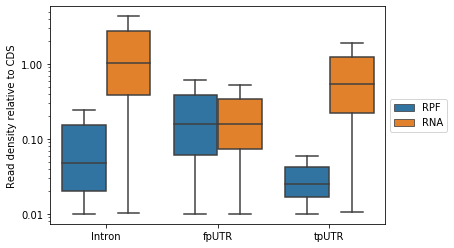

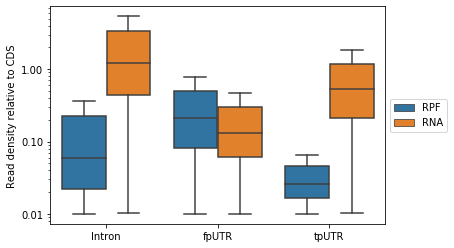

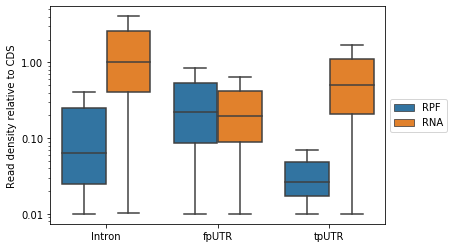

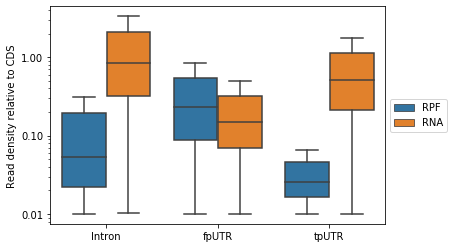

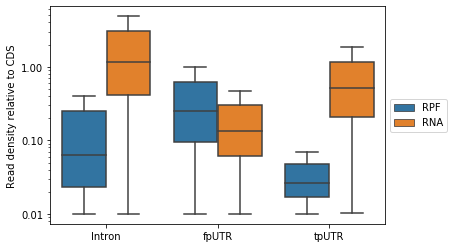

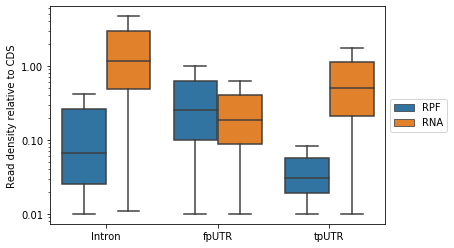

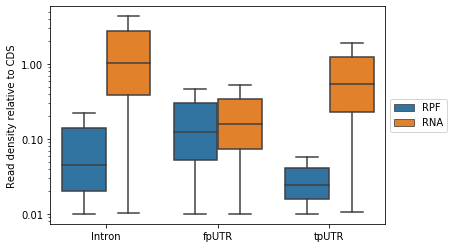

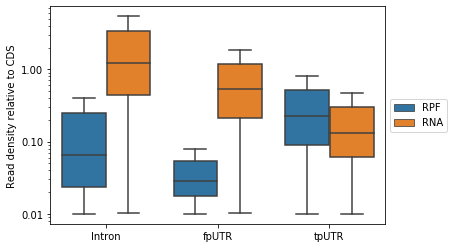

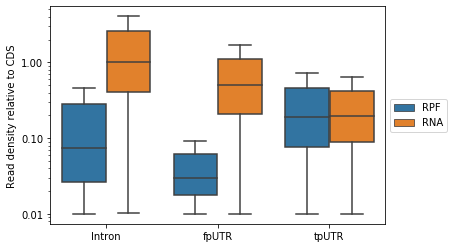

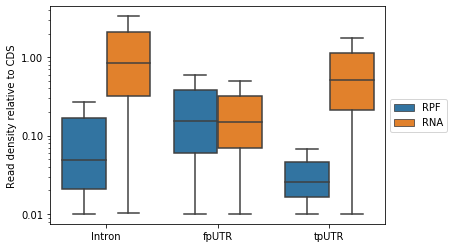

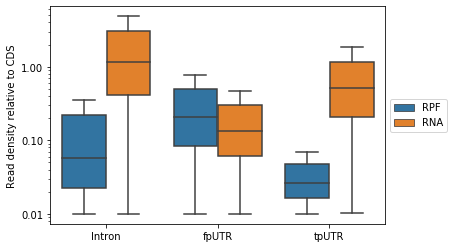

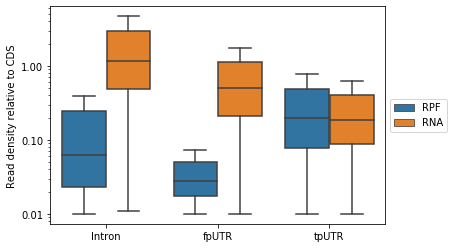

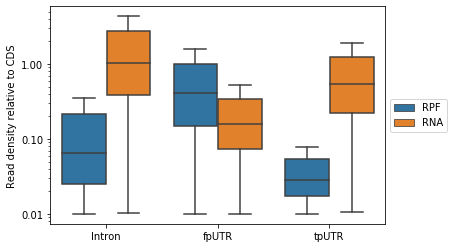

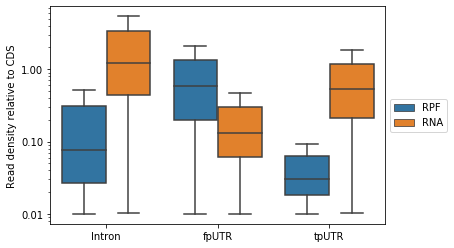

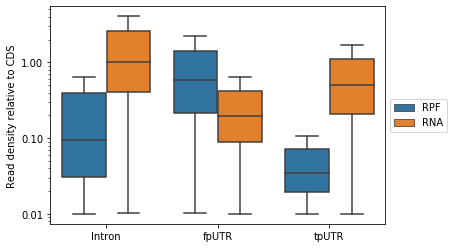

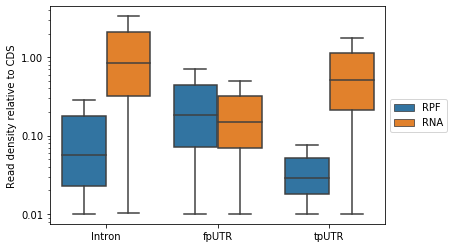

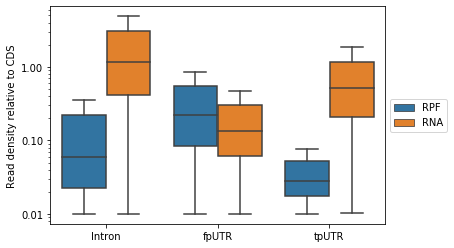

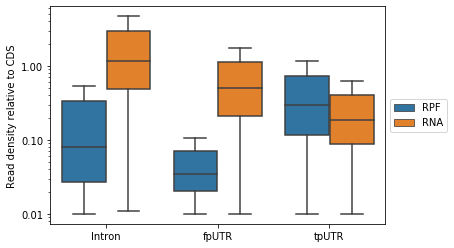

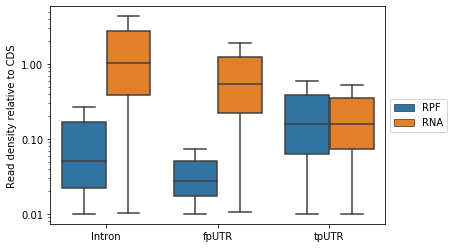

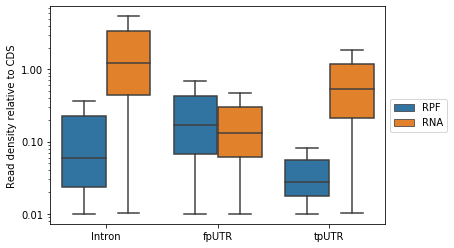

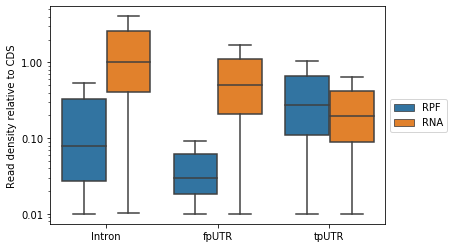

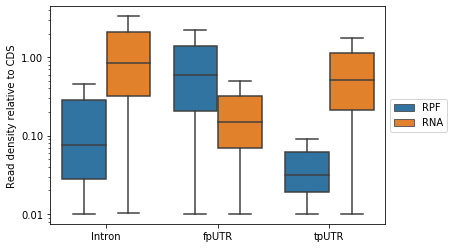

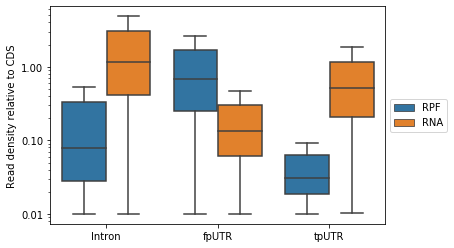

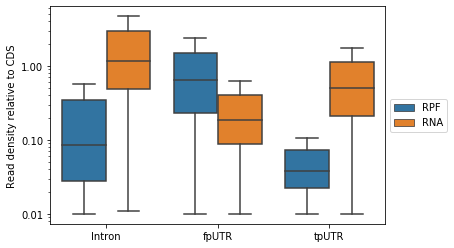

In [11]:
for i in range(30):
    batch = [fid['Types'][i],fid['Timepoint'][i],fid['Sets'][i]]
    if batch[0]=='RNA':
        continue
    if batch[0]!='RPF':
        batch[0]='RPF_'+batch[0]
    rna_row = fid[(fid['Types']== 'RNA') & (fid['Timepoint']==batch[1]) & (fid['Sets']==batch[2])]
    rpf_file = readFile('txcdutr/gene_TXCDUTR_ReadOutput_processedData_'+fid['FileName'][i]+'_shift15.txt')
    rna_file = readFile('txcdutr/gene_TXCDUTR_ReadOutput_processedData_'+rna_row['FileName'].iloc[0]+'_shift15.txt','RNA')
    df = combDF(rpf_file,rna_file)
    fig = plotBox(df)
    outname = batch[0][4:]+'_'+str(batch[1])+'_'+str(batch[2])
    fig.savefig('plots/'+outname+'.png',bbox_inches='tight')